##### Dependencies

This notebook requires sklearn, pandas, and numpy

# Exercise

Objective: Create a program to identify images of 10 handwritten digits in the digit dataset. This is a classification exercise.


Caveat: One will need to run K-means **without** using any machine learning packages. K-means from scratch.

## Approach:

1. Come up with a set of clusters where distance between clusters is large & distance between points within a cluster is small

2. Represent each cluster with a single vector called a 'centroid'

3. Minimize the sum of distances between points & centers of their assigned clusters

## Steps:

1. Randomly initialize k-number of centroids

2. Assign each point to the closest centroid: argmin of L2 norm

3. Update the centroids: For each cluster, calculate the mean of all data points assigned to the cluster.

4. Based on the new centroids, assign each point to the closest (new centroids), essentially: iterate over steps 2 & 3

In [ ]:
# If needed: Install the latest sklearn package

#!pip install --upgrade scikit-learn

In [ ]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np

In [ ]:
def cluster_loss(x,centroids):
    '''
    Single-vector L2 Loss function for k-means
    
    Params: 
    x is a dataframe of a single point that correspond to a given cluster
    centroids is a dataframe for all possible k numbers of centroids
    
    Returns:
    A tuple of the class label of the centroid closest to the datapoint 
    and its loss squared value = (x- closest centroid)^2
    '''
    loss = []
    
    for index, row in centroids.iterrows():
        dis = ((x - row)**2).sum()
        loss.append(dis)
        
    mLoss = min(loss)
    mLossInd = loss.index(mLoss)
    return (mLoss, mLossInd)

def update_clusters(x):
    '''
    Updates cluster centers to be mean of all points assigned to the cluster
    
    Params:
    X is a dataframe of clustered data points, whereby cluster assignment is contained inside 'cluster_assignment' column
    
    Returns:
    A dataframe of new centroid points, which really are the mean of all data points in a given cluster
    '''
    new_centroids = x.groupby('cluster_assignment',as_index=False).mean()
    new_centroids = new_centroids.drop(columns=['cluster_assignment','cluster_loss_sq'])
    return (new_centroids)

In [ ]:
# Dataset of 10 handwritten digits (10 classes), with 64 dimensions

ld = load_digits(as_frame=True)

x_df = pd.DataFrame(ld.data, columns=ld.feature_names)

In [ ]:
# Initiate epoch-loss tracker for plotting later
epoch_loss_tracker_15 = pd.DataFrame(columns=["Epoch","SSE"])
epoch_loss_tracker_15 = epoch_loss_tracker_15.append({'Epoch':0, 'SSE': 0}, ignore_index=True) #Placeholder hack for while loop to work

# Step 1: Randomly initiate centroids. Control number of 'k' via parameter after "size="
initiate_cent = pd.DataFrame(np.random.randint(0,16, size=(15, len(ld.feature_names))), columns=ld.feature_names)

# Step 2: Assign each data point to the closest centroid and calculate euclidean distance squared to respective centroids
x_df['cluster_loss_sq'] = x_df.apply(lambda row: cluster_loss(row, initiate_cent), axis=1)
x_df['cluster_loss_sq'], x_df['cluster_assignment'] = zip(*x_df['cluster_loss_sq'])
epoch_loss_tracker_15 = epoch_loss_tracker_15.append({'Epoch':1, 'SSE': round(x_df['cluster_loss_sq'].sum(),9)}, ignore_index=True)
ld_df = update_clusters(x_df)
x_df = x_df.drop(columns=['cluster_assignment','cluster_loss_sq'])

# Step 3: Iterate until SSE no longer improves (accurate to the 2nd decimal point)
step = 2

while epoch_loss_tracker_15.iloc[-1, 1] != epoch_loss_tracker_15.iloc[-2, 1]:
    x_df['cluster_loss_sq'] = x_df.apply(lambda row: cluster_loss(row, ld_df), axis=1)
    x_df['cluster_loss_sq'], x_df['cluster_assignment'] = zip(*x_df['cluster_loss_sq'])
    epoch_loss_tracker_15 = epoch_loss_tracker_15.append({'Epoch':step, 'SSE': round(x_df['cluster_loss_sq'].sum(),9)}, ignore_index=True)
    ld_df = update_clusters(x_df)
    x_df = x_df.drop(columns=['cluster_assignment','cluster_loss_sq'])
    step += 1

In [ ]:
# I ran the block above 3 times, each time for k= 5, k=10, and k = 15 respectively
# Loss values are stored as "epoch_loss_tracker_5", "epoch_loss_tracker_10", and "epoch_loss_tracker_15"
# We will merge these loss values and plot them in one chart

loss = pd.merge(epoch_loss_tracker_5, epoch_loss_tracker_10, on="Epoch", how = 'outer')

loss = pd.merge(loss, epoch_loss_tracker_15, on="Epoch", how = 'outer')

loss.rename(columns={"SSE_x": "k = 5", "SSE_y": "k = 10",
                    "SSE":"k = 15"}, inplace=True)

loss = loss.set_index('Epoch')

loss = loss.iloc[1:] #delete placeholder row

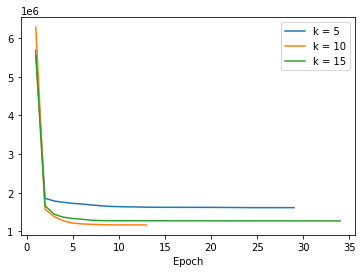

In [ ]:
loss.plot()

In [ ]:
# Observe the actual loss values below

loss

,k = 5,k = 10,k = 15
Epoch,,,
1.0,5.68612e+06,6.28376e+06,5.55209e+06
2.0,1.85776e+06,1.57757e+06,1.66205e+06
3.0,1.7854e+06,1.37907e+06,1.44316e+06
4.0,1.75259e+06,1.27265e+06,1.36703e+06
5.0,1.72638e+06,1.21493e+06,1.33562e+06
6.0,1.70927e+06,1.1941e+06,1.3147e+06
7.0,1.68618e+06,1.18393e+06,1.29039e+06
8.0,1.66405e+06,1.17498e+06,1.27958e+06
9.0,1.64851e+06,1.16913e+06,1.27702e+06


# Observations

The actual dataset is handwritten samples of 10 digits. In theory, the clusters should stand to benefit the most from k = 10 (10 clusters)

1. We observe the lowest loss achieved is indeed when k = 10